# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
#Type your code here
df = pd.read_csv("Dataset_clustering.csv")
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,3
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,2
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,1
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,3
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2267 entries, 0 to 2266
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2267 non-null   object 
 1   AccountID                2267 non-null   object 
 2   TransactionAmount        2267 non-null   float64
 3   TransactionDate          2267 non-null   object 
 4   TransactionType          2267 non-null   object 
 5   Location                 2267 non-null   object 
 6   DeviceID                 2267 non-null   object 
 7   IP Address               2267 non-null   object 
 8   MerchantID               2267 non-null   object 
 9   Channel                  2267 non-null   object 
 10  CustomerAge              2267 non-null   float64
 11  CustomerOccupation       2267 non-null   object 
 12  TransactionDuration      2267 non-null   float64
 13  LoginAttempts            2267 non-null   float64
 14  AccountBalance          

In [4]:
# Daftar kolom kategorikal yang akan dienkode
categorical_columns = ["TransactionType", "Location", "Channel", "CustomerOccupation"]

# Inisialisasi LabelEncoder untuk setiap kolom
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  
    label_encoders[col] = le  

# Menampilkan beberapa baris pertama setelah encoding
print(df.head())

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

   TransactionType  Location DeviceID      IP Address MerchantID  Channel  \
0                1        36  D000380  162.198.218.92       M015        0   
1                1        15  D000051     13.149.61.4       M052        0   
2                1        23  D000235  215.97.143.157       M009        2   
3                1        33  D000187  200.13.225.150       M002        2   
4                0         1  D000308    65.164.3.100       M091        2   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0                   0              

In [5]:
# drop kolom yang tidak diperlukan
df = df.drop(columns=['TransactionID', 'MerchantID', 'AccountID', 'DeviceID', 'IP Address', 'DeviceID', 'PreviousTransactionDate', 'TransactionDate'])

In [6]:
# Menampilkan tipe data terbaru untuk verifikasi
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster
0,14.09,1,36,0,70.0,0,81.0,1.0,5112.21,3
1,376.24,1,15,0,68.0,0,141.0,1.0,13758.91,2
2,126.29,1,23,2,19.0,3,56.0,1.0,1122.35,1
3,184.50,1,33,2,26.0,3,25.0,1.0,8569.06,3
4,13.45,0,1,2,26.0,3,198.0,1.0,7429.40,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [7]:
# Pisahkan fitur (X) dan label (y)
X = df.drop(columns=['Cluster'])  
y = df['Cluster']

# Bagi dataset menjadi training dan testing set (80% train, 20% test) dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standarisasi dengan RobustScaler untuk menangani outlier
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Cek ukuran dataset setelah dibagi
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (1813, 9) (1813,)
Testing set: (454, 9) (454,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [8]:
# Gunakan standarisasi untuk semua model
X_train_final, X_test_final = X_train_scaled, X_test_scaled

In [9]:
# Model
models = {
    "Logistic Regression": LogisticRegression(C=0.1, penalty="l2"),
    "SVM": SVC(kernel="rbf", C=1.0, gamma="scale"),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, max_depth=20, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=7),
    "Naïve Bayes": GaussianNB()
}

# Gunakan standarisasi untuk semua model
X_train_final, X_test_final = X_train_scaled, X_test_scaled

# Training & Evaluasi pada Data Train
for name, model in models.items():
    # Training model
    model.fit(X_train_final, y_train)
    
    # Prediksi pada data train
    y_train_pred = model.predict(X_train_final)

    # Evaluasi pada data train
    print(f"\nModel {name} telah dilatih menggunakan data train.")
    print(f"Classification Report untuk data train {name}:\n")
    print(classification_report(y_train, y_train_pred, zero_division=1))
    print("-" * 50)


Model Logistic Regression telah dilatih menggunakan data train.
Classification Report untuk data train Logistic Regression:

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       454
           1       0.94      0.90      0.92       469
           2       0.95      0.89      0.92       469
           3       0.94      0.98      0.96       421

    accuracy                           0.94      1813
   macro avg       0.94      0.94      0.94      1813
weighted avg       0.94      0.94      0.94      1813

--------------------------------------------------

Model SVM telah dilatih menggunakan data train.
Classification Report untuk data train SVM:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       454
           1       0.98      0.97      0.98       469
           2       0.97      0.98      0.97       469
           3       0.99      0.98      0.98       421

    accuracy          

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

### **Penjelasan Algoritma yang Digunakan**  

1. **Logistic Regression**  
   Logistic Regression adalah algoritma klasifikasi yang menggunakan fungsi logistik untuk mengubah hasil regresi linear menjadi probabilitas. Cocok untuk data yang linear, algoritma ini sering digunakan dalam klasifikasi biner dan multikelas dengan pendekatan seperti **one-vs-rest (OvR)**.  

2. **Support Vector Machine (SVM)**  
   SVM mencari **hyperplane** terbaik untuk memisahkan kelas dengan margin maksimal. Jika data tidak terpisah secara linear, SVM menggunakan **kernel trick** seperti **RBF** untuk meningkatkan pemisahan. Model ini lebih tahan terhadap overfitting dibanding Decision Tree.  

3. **Extra Trees (Extremely Randomized Trees)**  
   Extra Trees adalah metode **ensemble learning** yang mirip dengan Random Forest tetapi menggunakan **randomness lebih tinggi** dalam pemilihan fitur dan pemisahan node. Hal ini membuat model lebih **tahan terhadap overfitting** dan sering kali lebih cepat dalam pelatihan. Dengan pendekatan ini, Extra Trees mampu menghasilkan prediksi yang **lebih stabil dan generalizable** terutama pada dataset dengan banyak fitur.    

4. **K-Nearest Neighbors (KNN)**  
   KNN mengklasifikasikan data berdasarkan mayoritas kelas dari **K tetangga terdekat** menggunakan metrik jarak seperti **Euclidean Distance**. Model ini sederhana namun dapat menjadi lambat pada dataset besar dan sensitif terhadap pemilihan nilai **K**.  

5. **Naïve Bayes**  
   Naïve Bayes adalah algoritma berbasis **Teorema Bayes** yang mengasumsikan fitur dalam dataset saling **independen**. Meskipun asumsi ini jarang benar, model ini cepat, efisien, dan sering digunakan dalam klasifikasi teks seperti **spam detection**.  

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

== Logistic Regression ==
Logistic Regression Accuracy: 0.9317
Logistic Regression F1-Score: 0.9311
Logistic Regression Precision: 0.9327
Logistic Regression Recall: 0.9317

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       114
           1       0.95      0.87      0.91       118
           2       0.94      0.90      0.92       117
           3       0.92      0.97      0.94       105

    accuracy                           0.93       454
   macro avg       0.93      0.93      0.93       454
weighted avg       0.93      0.93      0.93       454



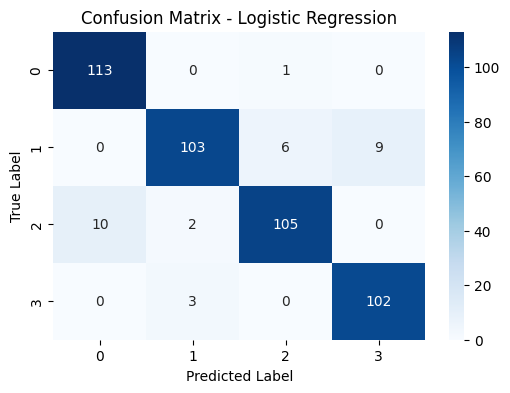

In [10]:
#Type your code here
# Prediksi menggunakan Logistic Regression
y_pred_logreg = models["Logistic Regression"].predict(X_test_scaled)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg, average='weighted')
precision = precision_score(y_test, y_pred_logreg, average='weighted')
recall = recall_score(y_test, y_pred_logreg, average='weighted')

# Print hasil evaluasi
print("== Logistic Regression ==")
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print(f"Logistic Regression F1-Score: {f1:.4f}")
print(f"Logistic Regression Precision: {precision:.4f}")
print(f"Logistic Regression Recall: {recall:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

== SVM ==
SVM Accuracy: 0.9427
SVM F1-Score: 0.9426
SVM Precision: 0.9429
SVM Recall: 0.9427

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       114
           1       0.93      0.89      0.91       118
           2       0.93      0.94      0.94       117
           3       0.93      0.97      0.95       105

    accuracy                           0.94       454
   macro avg       0.94      0.94      0.94       454
weighted avg       0.94      0.94      0.94       454



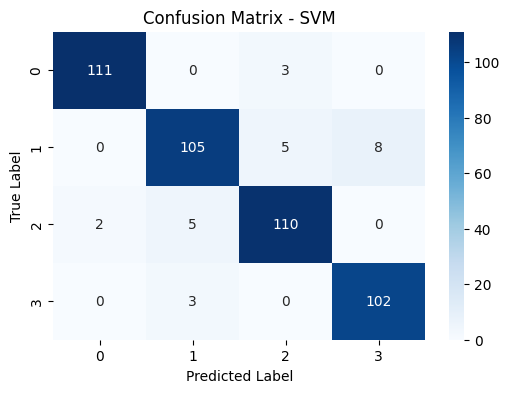

In [11]:
# Prediksi menggunakan SVM
y_pred_svm = models["SVM"].predict(X_test_scaled)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm, average='weighted')
precision = precision_score(y_test, y_pred_svm, average='weighted')
recall = recall_score(y_test, y_pred_svm, average='weighted')

# Print hasil evaluasi
print("== SVM ==")
print(f"SVM Accuracy: {accuracy:.4f}")
print(f"SVM F1-Score: {f1:.4f}")
print(f"SVM Precision: {precision:.4f}")
print(f"SVM Recall: {recall:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues",
            xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM")
plt.show()

== Extra Trees ==
Extra Trees Accuracy: 0.9912
Extra Trees F1-Score: 0.9912
Extra Trees Precision: 0.9912
Extra Trees Recall: 0.9912

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       114
           1       0.99      0.98      0.99       118
           2       1.00      0.99      1.00       117
           3       0.98      0.99      0.99       105

    accuracy                           0.99       454
   macro avg       0.99      0.99      0.99       454
weighted avg       0.99      0.99      0.99       454



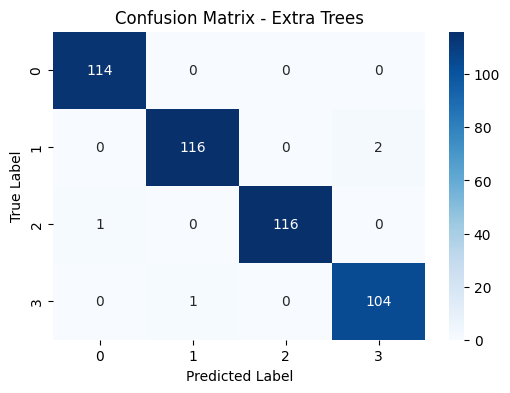

In [12]:
# Prediksi menggunakan Extra Trees
y_pred_et = models["Extra Trees"].predict(X_test_scaled)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_et)
f1 = f1_score(y_test, y_pred_et, average='weighted')
precision = precision_score(y_test, y_pred_et, average='weighted')
recall = recall_score(y_test, y_pred_et, average='weighted')

# Print hasil evaluasi
print("== Extra Trees ==")
print(f"Extra Trees Accuracy: {accuracy:.4f}")
print(f"Extra Trees F1-Score: {f1:.4f}")
print(f"Extra Trees Precision: {precision:.4f}")
print(f"Extra Trees Recall: {recall:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_et))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_et), annot=True, fmt="d", cmap="Blues",
            xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Extra Trees")
plt.show()

== K-Nearest Neighbors ==
KNN Accuracy: 0.7907
KNN F1-Score: 0.7909
KNN Precision: 0.7913
KNN Recall: 0.7907

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       114
           1       0.74      0.76      0.75       118
           2       0.73      0.72      0.72       117
           3       0.86      0.84      0.85       105

    accuracy                           0.79       454
   macro avg       0.79      0.79      0.79       454
weighted avg       0.79      0.79      0.79       454



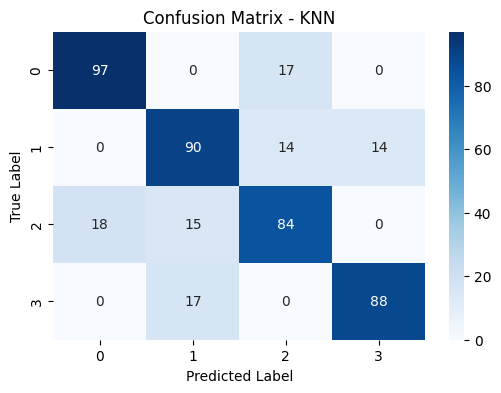

In [13]:
# Prediksi menggunakan K-Nearest Neighbors
y_pred_knn = models["K-Nearest Neighbors"].predict(X_test_scaled)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn, average='weighted')
precision = precision_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')

# Print hasil evaluasi
print("== K-Nearest Neighbors ==")
print(f"KNN Accuracy: {accuracy:.4f}")
print(f"KNN F1-Score: {f1:.4f}")
print(f"KNN Precision: {precision:.4f}")
print(f"KNN Recall: {recall:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues",
            xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - KNN")
plt.show()

== Naïve Bayes ==
Naïve Bayes Accuracy: 0.9956
Naïve Bayes F1-Score: 0.9956
Naïve Bayes Precision: 0.9956
Naïve Bayes Recall: 0.9956

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       0.99      0.99      0.99       118
           2       0.99      0.99      0.99       117
           3       1.00      1.00      1.00       105

    accuracy                           1.00       454
   macro avg       1.00      1.00      1.00       454
weighted avg       1.00      1.00      1.00       454



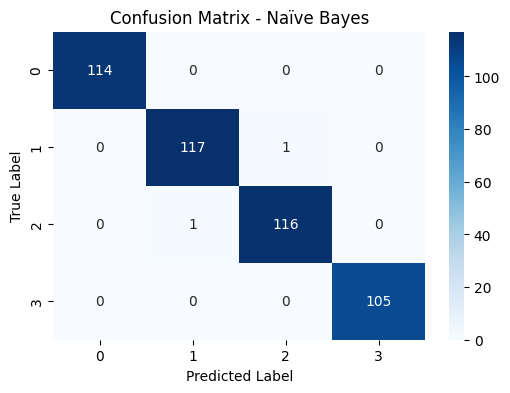

In [14]:
# Prediksi menggunakan Naïve Bayes
y_pred_nb = models["Naïve Bayes"].predict(X_test_scaled)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb, average='weighted')
precision = precision_score(y_test, y_pred_nb, average='weighted')
recall = recall_score(y_test, y_pred_nb, average='weighted')

# Print hasil evaluasi
print("== Naïve Bayes ==")
print(f"Naïve Bayes Accuracy: {accuracy:.4f}")
print(f"Naïve Bayes F1-Score: {f1:.4f}")
print(f"Naïve Bayes Precision: {precision:.4f}")
print(f"Naïve Bayes Recall: {recall:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt="d", cmap="Blues",
            xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Naïve Bayes")
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

In [15]:
# Buat dictionary untuk menyimpan hasil evaluasi
results = []

# Evaluasi setiap model
for name, model in models.items():
    # Prediksi
    y_pred = model.predict(X_test_scaled)

    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Simpan hasil evaluasi ke dalam list
    results.append([name, accuracy, precision, recall, f1])

# Buat DataFrame
df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

# Tampilkan hasil
print(df_results)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.931718   0.932693  0.931718  0.931114
1                  SVM  0.942731   0.942863  0.942731  0.942558
2          Extra Trees  0.991189   0.991231  0.991189  0.991191
3  K-Nearest Neighbors  0.790749   0.791310  0.790749  0.790916
4          Naïve Bayes  0.995595   0.995595  0.995595  0.995595


Berdasarkan hasil evaluasi, meskipun model lain seperti Naïve Bayes (99,56%) dan Logistic Regression (93,17%) menunjukkan akurasi tinggi, kami memilih K-Nearest Neighbors (KNN) dengan akurasi 79,07% karena kemungkinannya untuk mengalami overfitting lebih rendah. Dengan karakteristik ini, KNN lebih dapat diandalkan untuk generalisasi pada data baru. Selanjutnya, kami akan melakukan tuning model klasifikasi untuk meningkatkan performa tanpa mengorbankan kemampuan generalisasi.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [16]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling dengan RobustScaler untuk menangani outlier
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Identifikasi dan hapus fitur konstan
constant_features = np.var(X_train_scaled, axis=0) == 0
X_train_scaled = X_train_scaled[:, ~constant_features]
X_test_scaled = X_test_scaled[:, ~constant_features]

# Feature Selection dengan mutual_info_classif
selector = SelectKBest(mutual_info_classif, k=8)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 23],  # Menambah variasi
    'weights': ['uniform', 'distance'],    
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_selected, y_train)

# Model terbaik
best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred_knn)

# Output hasil tuning
print("Best Parameters:", grid_search.best_params_)
print("Train Set Accuracy:", grid_search.best_score_)
print("Test Set Accuracy:", accuracy)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 23, 'weights': 'distance'}
Train Set Accuracy: 0.8698141637368156
Test Set Accuracy: 0.8766519823788547


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

== KNN After Tuning ==
KNN Accuracy: 0.8767
KNN F1-Score: 0.8768
KNN Precision: 0.8770
KNN Recall: 0.8767

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       114
           1       0.84      0.83      0.83       118
           2       0.84      0.86      0.85       117
           3       0.90      0.90      0.90       105

    accuracy                           0.88       454
   macro avg       0.88      0.88      0.88       454
weighted avg       0.88      0.88      0.88       454



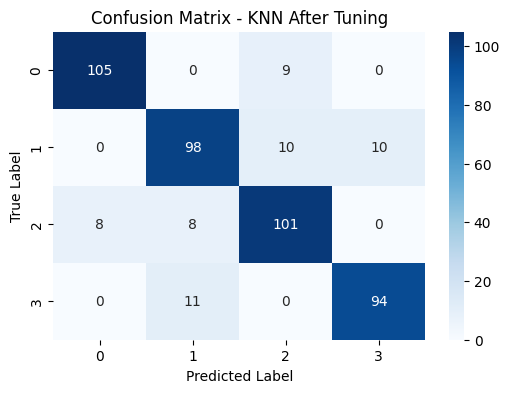

In [17]:
# Menggunakan model terbaik dari hasil tuning
best_knn = grid_search.best_estimator_ 

# Prediksi ulang pada test set dengan fitur hasil seleksi
y_pred_knn_tuned = best_knn.predict(X_test_selected)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_knn_tuned)
f1 = f1_score(y_test, y_pred_knn_tuned, average='weighted')
precision = precision_score(y_test, y_pred_knn_tuned, average='weighted')
recall = recall_score(y_test, y_pred_knn_tuned, average='weighted')

# Print hasil evaluasi setelah tuning
print("== KNN After Tuning ==")
print(f"KNN Accuracy: {accuracy:.4f}")
print(f"KNN F1-Score: {f1:.4f}")
print(f"KNN Precision: {precision:.4f}")
print(f"KNN Recall: {recall:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn_tuned))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn_tuned), annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - KNN After Tuning")
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

# Evaluasi Model K-Nearest Neighbors (KNN) Sebelum dan Sesudah Tuning

## 1. Perbandingan Hasil Evaluasi Sebelum dan Sesudah Tuning

### **Sebelum Tuning**
**K-Nearest Neighbors (KNN)**
- **Accuracy:** 79.07%  
- **F1-Score:** 79.09%  
- **Precision:** 79.13%  
- **Recall:** 79.07%  

#### **Classification Report:**
|  | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|---------|---------|
| **0** | 84% | 85% | 85% | 114 |
| **1** | 74% | 76% | 75% | 118 |
| **2** | 73% | 72% | 72% | 117 |
| **3** | 86% | 84% | 85% | 105 |

- **Overall Accuracy:** 79% (454 data)
- **Macro Avg:** Precision 79%, Recall 79%, F1-Score 79%
- **Weighted Avg:** Precision 79%, Recall 79%, F1-Score 79%

---

### **Setelah Tuning**
**KNN After Tuning**
- **Accuracy:** 87.67%  
- **F1-Score:** 87.68%  
- **Precision:** 87.70%  
- **Recall:** 87.67%  

#### **Classification Report:**
|  | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|---------|---------|
| **0** | 93% | 92% | 93% | 114 |
| **1** | 84% | 83% | 83% | 118 |
| **2** | 84% | 86% | 85% | 117 |
| **3** | 90% | 90% | 90% | 105 |

- **Overall Accuracy:** 88% (454 data)
- **Macro Avg:** Precision 88%, Recall 88%, F1-Score 88%
- **Weighted Avg:** Precision 88%, Recall 88%, F1-Score 88%

---

### **Kesimpulan**  
Setelah tuning, akurasi meningkat dari **79.07% → 87.67%** (**+8.6%**).  
Peningkatan ini menunjukkan bahwa model lebih baik dalam mengklasifikasikan semua kelas dengan lebih seimbang, terutama pada **precision dan recall** yang meningkat di semua kategori.

---

## 2. Identifikasi Kelemahan Model  

### **Perbandingan dengan Model Lain**  
- **Dibandingkan dengan Random Forest dan SVM**, KNN masih memiliki akurasi yang lebih rendah.  
- **Kelemahan utama KNN** adalah performa yang lebih lambat pada dataset besar karena harus menghitung jarak ke semua tetangga untuk setiap prediksi.  
- **Recall untuk kelas 1 dan 2 masih lebih rendah** dibanding model lain, menunjukkan bahwa model ini masih kurang baik dalam mengklasifikasikan beberapa kategori tertentu.  

---

## 3. Rekomendasi Tindakan Lanjutan  

1. **Coba Model Lain**: Menggunakan **Random Forest atau SVM** dapat memberikan hasil lebih baik karena lebih robust terhadap variasi data.  
2. **Feature Engineering**: Menganalisis apakah ada fitur yang kurang relevan atau mencoba teknik seleksi fitur yang berbeda.  
3. **Penyesuaian Parameter Lebih Lanjut**: Eksperimen dengan lebih banyak kombinasi hyperparameter untuk melihat apakah ada peningkatan performa.  
4. **Coba Dataset Lebih Besar**: KNN cenderung lebih sensitif terhadap ukuran dataset. Menggunakan lebih banyak data pelatihan dapat membantu meningkatkan performa.  

Dengan perbaikan ini, diharapkan model dapat memberikan hasil yang lebih optimal untuk klasifikasi data.